### Denoising an image using a few cv2 transformations

In [15]:
import pandas as pd

In [16]:
#make train and test as in https://www.kaggle.com/yasufuminakama/molecular-translation-naive-baseline
train = pd.read_csv('../input/bms-molecular-translation/train_labels.csv')
test = pd.read_csv('../input/bms-molecular-translation/sample_submission.csv')

def get_train_file_path(image_id):
    return "../input/bms-molecular-translation/train/{}/{}/{}/{}.png".format(
        image_id[0], image_id[1], image_id[2], image_id 
    )

def get_test_file_path(image_id):
    return "../input/bms-molecular-translation/test/{}/{}/{}/{}.png".format(
        image_id[0], image_id[1], image_id[2], image_id 
    )

train['file_path'] = train['image_id'].progress_apply(get_train_file_path)
test['file_path'] = test['image_id'].progress_apply(get_test_file_path)


# print(f'train.shape: {train.shape}  test.shape: {test.shape}')
# display(train.head())
# display(test.head())

  0%|          | 0/2424186 [00:00<?, ?it/s]

  0%|          | 0/1616107 [00:00<?, ?it/s]

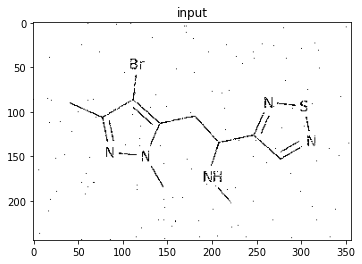

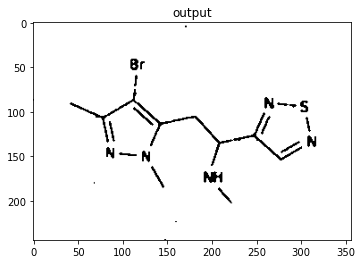

----------------


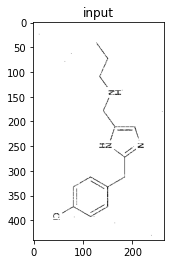

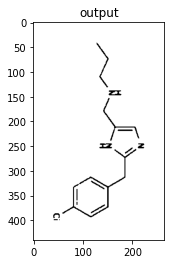

----------------


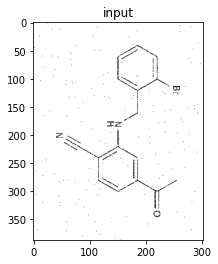

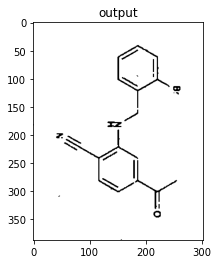

----------------


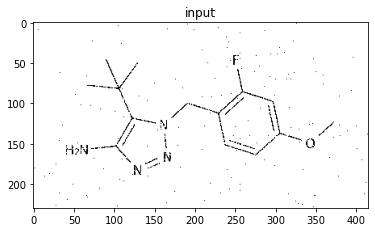

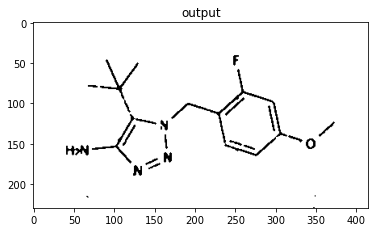

----------------


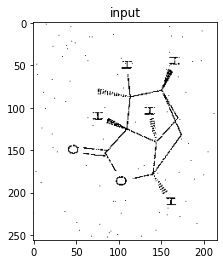

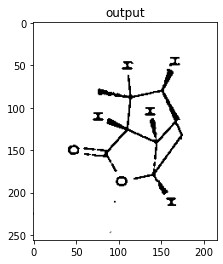

----------------


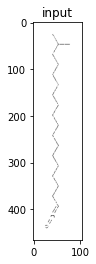

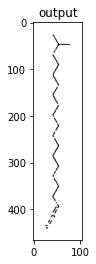

----------------


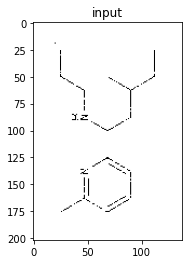

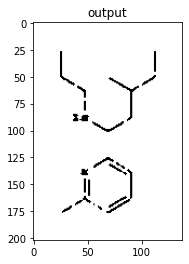

----------------


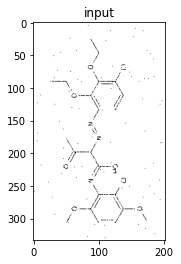

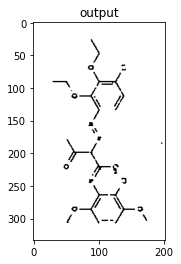

----------------


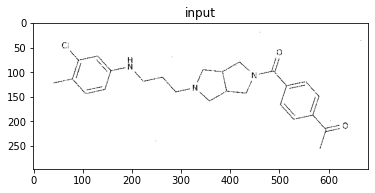

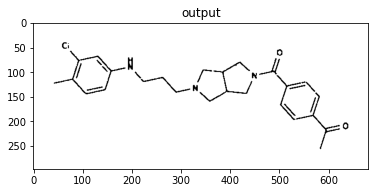

----------------


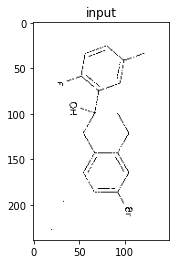

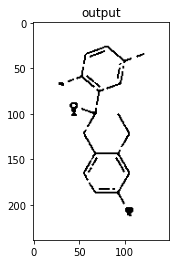

----------------


In [18]:
import cv2
    
def invert_(img, show_transformation):
    img = cv2.bitwise_not(img)
    if show_transformation:
        plt.imshow(img)
        plt.show()
    return img

def dilate_(img, k, iteration, show_transformation):
    kernel = np.ones(k,np.uint8)
    img = cv2.dilate(img,kernel,iterations = iteration)
    if show_transformation:
        plt.imshow(img)
        plt.show()
    return img
    

def erode_(img, show_transformation):
    kernel = np.ones((1,1),np.uint8)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    if show_transformation:
        plt.imshow(img)
        plt.show()
    return img

def median_blur_(img, show_transformation):
    img = cv2.medianBlur(img, 3)
    if show_transformation:
        plt.imshow(img)
        plt.show()
    return img

z = 0

show_transformation = False

for index, row in test.iterrows():
    
    z += 1

    # original image
    img = cv2.imread(row['file_path'], 1)
    plt.imshow(img)
    plt.title('input')
    plt.show()
    
    # transformations
    img = invert_(img, show_transformation=show_transformation)
    img = erode_(img, show_transformation=show_transformation)
    img = dilate_(img, (2, 2), 1, show_transformation=show_transformation)
    img = median_blur_(img, show_transformation=show_transformation)
    img = invert_(img, show_transformation=show_transformation)
    
    # output
    plt.title('output')
    plt.imshow(img)
    plt.show()
    
    print('----------------')

    if z == 10:
        break

### Next step would be to run gridsearch on all the transformations with random parameters and print out a collection of a grid of 10 transformed images. If we find a grid that looks good, save the parameters to be used later.